# Telco Customer Churn Prediction Results

## Introduction and Context

## Libraries and Configurations

In [1]:
import sys
from pathlib import Path

# path to project root
project_root = Path().resolve().parent
sys.path.append(str(project_root))

In [2]:
import src.utils as ut
import src.preprocess as pp
import src.config as cf
import src.train as tn
import src.evaluate as et

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

pd.options.display.max_columns = None

project path: C:\Users\Usuario\OneDrive\Documentos\Proyectos Personales\Data Science\Public Portfolio Data Science\241117 Telco Customer Churn
raw data path: C:\Users\Usuario\OneDrive\Documentos\Proyectos Personales\Data Science\Public Portfolio Data Science\241117 Telco Customer Churn\data\raw_data.csv
model path C:\Users\Usuario\OneDrive\Documentos\Proyectos Personales\Data Science\Public Portfolio Data Science\241117 Telco Customer Churn\models\model.pkl
results path C:\Users\Usuario\OneDrive\Documentos\Proyectos Personales\Data Science\Public Portfolio Data Science\241117 Telco Customer Churn\results


## Data Loading

In [3]:
raw_data = ut.load_data(cf.paths['data_raw'])
raw_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Splitting and Preprocessing

### Target - Feature and Train - Test Split

In [4]:
X = raw_data.drop(columns = 'Churn', axis = 1)
y = raw_data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = cf.test_size, random_state = cf.random_state)

### Pipeline Definition

In [5]:
# create preprocessing pipeline for target variable
target_preprocessing_pipeline = pp.TargetPreprocess()

# create preprocessing pipeline for feature variables
feature_preprocessing_pipeline = Pipeline(steps = [
    ('feature_selection', pp.FeatureSelector()),
    ('data_cleaning', pp.DataCleaning()),
    ('feature_engineering', pp.FeatureEngineering()),
    ('outlier_detection', pp.OutlierDetector()),
    ('missing_values', pp.MissingValuesHandler()),
    ('encoding', pp.CategoricalEncoder()),
    ('scaling', pp.Scaling())
])

### Target Variable Preprocessing

In [6]:
y_train = target_preprocessing_pipeline.fit_transform(y_train)
y_test = target_preprocessing_pipeline.fit_transform(y_test)


### Feature Variable Preprocessing

In [7]:
X_train = feature_preprocessing_pipeline.fit_transform(X_train)

binary encoding applied to : gender
binary encoding applied to : PhoneService
binary encoding applied to : MultipleLines
binary encoding applied to : InternetService
binary encoding applied to : OnlineSecurity
binary encoding applied to : PaperlessBilling
ordinal encoding applied to : Contract
one - hot encoding applied to : PaymentMethod
one - hot encoding applied to : OnlineBackup
one - hot encoding applied to : DeviceProtection
one - hot encoding applied to : TechSupport
one - hot encoding applied to : StreamingTV
one - hot encoding applied to : StreamingMovies


In [8]:
X_train.head()

,index,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,TotalCost,RevenueAdjustment,LogMonthlyCharges,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,0.983243,1.0,0.0,0.013889,1.0,0.0,1.0,0.0,0.0,1.0,0.508458,0.005833,0.008111,0.499136,0.712816,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
1,0.745385,1.0,0.0,1.000000,0.0,0.0,1.0,1.0,0.5,0.0,0.487065,0.536914,0.565895,0.000000,0.696000,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
2,0.831014,1.0,0.0,0.291667,1.0,0.0,1.0,0.0,0.0,1.0,0.505970,0.168007,0.169719,0.601296,0.710888,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,0.510792,1.0,0.0,0.347222,1.0,0.0,1.0,0.0,0.0,1.0,0.770647,0.267661,0.279825,0.265227,0.884774,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1
4,0.588895,1.0,0.0,0.986111,1.0,1.0,0.0,0.0,0.5,0.0,0.065672,0.217194,0.206357,1.000000,0.164825,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [9]:
X_test = feature_preprocessing_pipeline.fit_transform(X_test)

binary encoding applied to : gender
binary encoding applied to : PhoneService
binary encoding applied to : MultipleLines
binary encoding applied to : InternetService
binary encoding applied to : OnlineSecurity
binary encoding applied to : PaperlessBilling
ordinal encoding applied to : Contract
one - hot encoding applied to : PaymentMethod
one - hot encoding applied to : OnlineBackup
one - hot encoding applied to : DeviceProtection
one - hot encoding applied to : TechSupport
one - hot encoding applied to : StreamingTV
one - hot encoding applied to : StreamingMovies


In [10]:
X_test.head()

,index,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,TotalCost,RevenueAdjustment,LogMonthlyCharges,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,0.133153,0.0,0.0,0.180556,0.0,0.0,1.0,0.0,0.0,0.0,0.114557,0.041950,0.046290,0.461343,0.258523,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
1,0.198948,0.0,0.0,0.486111,1.0,1.0,0.0,0.0,0.5,0.0,0.046023,0.089911,0.096313,0.421296,0.119032,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
2,0.783146,0.0,0.0,0.250000,1.0,0.0,0.0,0.0,0.5,0.0,0.006503,0.033517,0.041135,0.325694,0.018493,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
3,0.522950,1.0,0.0,0.597222,1.0,1.0,1.0,0.0,0.0,1.0,0.566783,0.363215,0.382659,0.142361,0.754265,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
4,0.996589,0.0,0.0,0.708333,1.0,0.0,0.0,0.0,0.5,0.0,0.019510,0.115764,0.124380,0.356481,0.053685,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


## Modeling

### Random Forest Classifier

#### Training

##### Model Fitting

In [28]:
# model fitting
rf_results = tn.train_model(
    model_name = 'RandomForest',
    X_train = X_train,
    y_train = y_train,
    mode = 'manual' 
)

# train score
rf_train_score = rf_results['cv_train_score']

# validation score
rf_val_score = rf_results['cv_val_score']

# best model
rf_best_model = rf_results['best_model']

# best parameters
rf_best_params = rf_results['best_params']

Log has been registered: Start training of model: RandomForest
Log has been registered: Best Hyperparameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5}
Log has been registered: CV Train Score: {'mean': 0.8269810772904144, 'std': 0.006487092243308422}
Log has been registered: CV Validation Score: {'mean': 0.7001316352017721, 'std': 0.02012952380907081}
Log has been registered: Training complete for model: RandomForest


##### Overfit Evaluation

In [29]:
rf_scores_df = pd.DataFrame(
    [rf_train_score, rf_val_score],
    index = ['Train Score', 'Validation Score']
)

rf_scores_df = rf_scores_df.style.format({
    'mean' : '{:.2%}',
    'std': '{:.2%}'
})

rf_scores_df

,mean,std
Train Score,82.70%,0.65%
Validation Score,70.01%,2.01%


##### Best Hyperparameters

In [30]:
pd.DataFrame(
    list(rf_best_params.items()),
    columns = ['Hyperparameter', 'Value']
)

,Hyperparameter,Value
0,n_estimators,100
1,max_depth,10
2,min_samples_split,5


##### Feature Importance

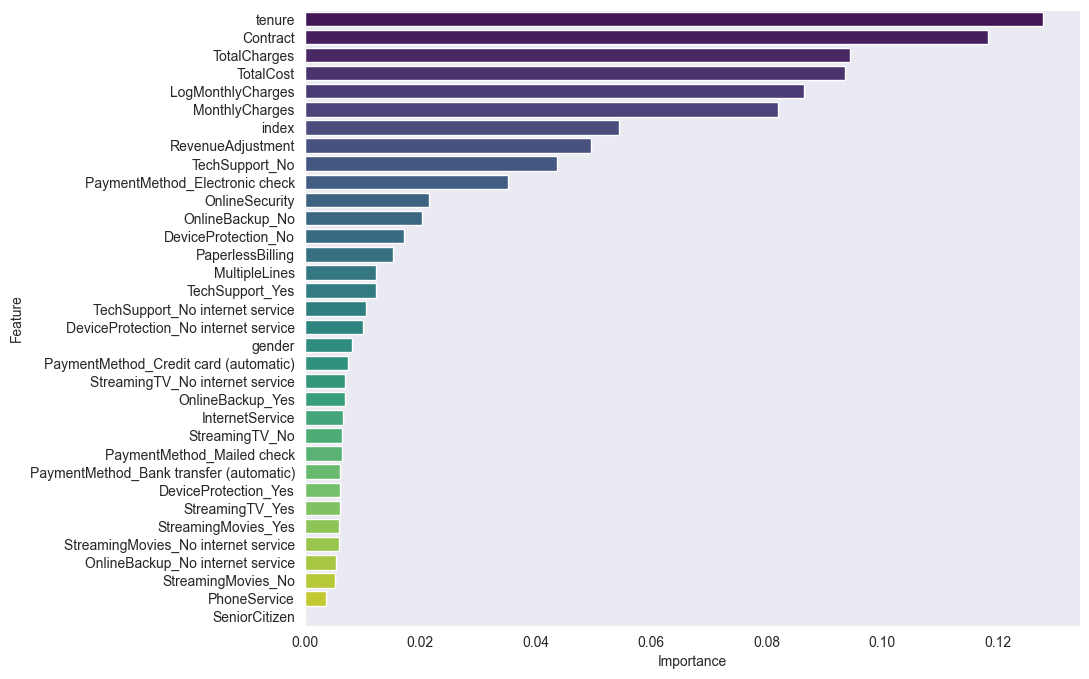

In [41]:
sns.set_style('dark')
sns.set_palette('dark')

importances = rf_best_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (10, 8))
sns.barplot(
    x = 'Importance', 
    y = 'Feature',
    data = importance_df,
    palette = 'viridis',
    hue = 'Feature',
    dodge = False)
plt.show()

#### Testing

##### Predictions

In [12]:
# values predictions
y_pred = rf_best_model.predict(X_test)

# probabability predictions
y_pred_proba = rf_best_model.predict_proba(X_test)[:, 1]

##### Classification Report

In [13]:
et.generate_classification_report(y_test, y_pred)

Classification report


,precision,recall,f1-score,support
0,0.795455,0.931034,0.857921,1015.0
1,0.683258,0.383249,0.491057,394.0
macro avg,0.739356,0.657142,0.674489,1409.0
weighted avg,0.764081,0.777857,0.755334,1409.0


Test Accuracy: 77.79%
Log has been registered: classification report generated


##### Confusion Matrix

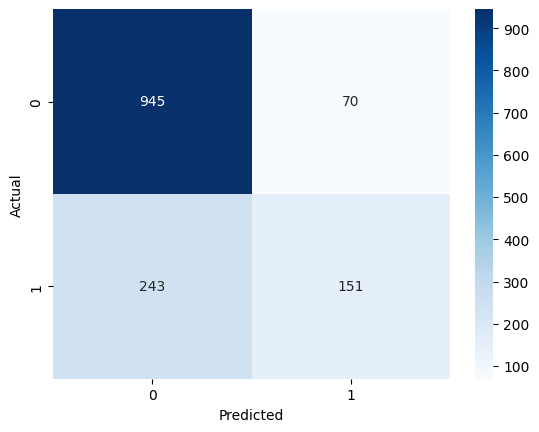

Log has been registered: confusion matrix displayed


In [14]:
et.plot_confusion_matrix(y_test, y_pred)

##### AUC-ROC Curve

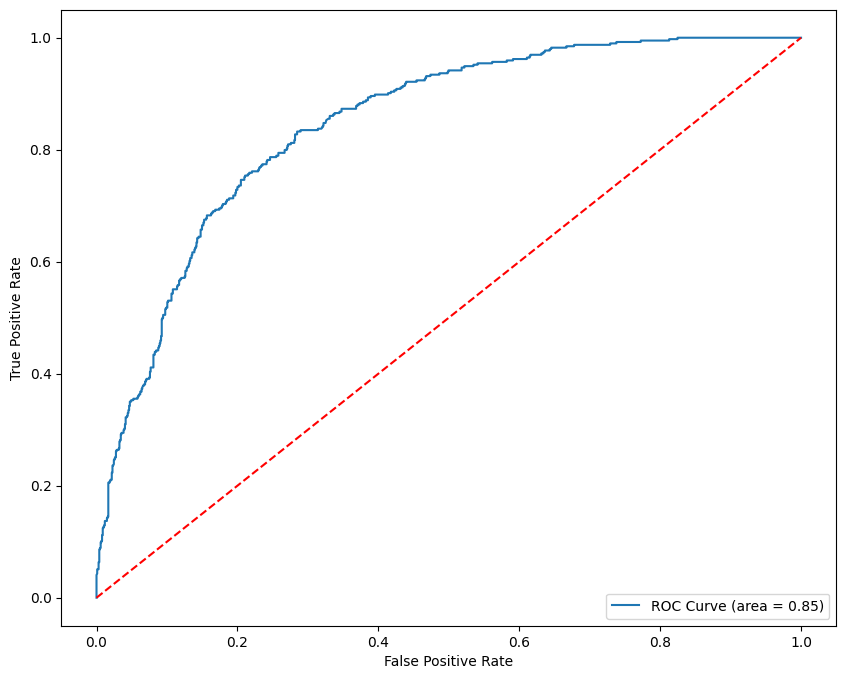

Log has been registered: roc curve displayed


In [15]:
et.plot_roc_curve(y_test, y_pred_proba)

## Results